In [1]:
import numpy as np
from scipy.special import gamma

from scipy.integrate import quad

import matplotlib.pyplot as plt

In [2]:

def fx(x):
    return np.sum(x**2)
    
def grad(f, x, epsilon=0.0001):
    g = np.zeros((x.shape[0],) )

    x_temp = x.copy()

    for i in range(x.shape[0]):
        x_temp[i] += epsilon
        if i>0:
            x_temp[i-1] -= epsilon
        g[i] = ((f(x_temp) - f(x)) / epsilon) 
    return g

In [3]:
def optimizer(f, x0, lr=0.1, max_iter=500, return_history=False):
    x = x0
    history = [x]
    for i in range(max_iter):
        x_new = x - lr * grad(f, x)

        if f(x_new) < f(x):
            x = x_new
        else:
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
            
        history.append(x)
    if return_history:
        return x, history
    else:
        return x

In [4]:
def frac_optimizer(f, x0, lr=0.5, alpha=0.98, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0
    for i in range(max_iter):
       
        x_new_new = history[indx+1] - (lr/gamma(2-alpha)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]


In [5]:
def multi_frac_optimizer(f, x0, lr=0.5, alpha1=0.9, alpha2=1.1, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0
    for i in range(max_iter):

        t1 = (1/gamma(2-alpha1)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha1)
        t2 = (1/gamma(2-alpha2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha2)
       
        x_new_new = history[indx+1] - lr*(0.5*t1 + 0.5*t2)
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]

In [61]:
def dist_frac_optimizer(f, x0, lr=0.5, alpha1=0.9, alpha2=1.1, N=50, max_iter=1000, return_history=False):
    x = x0
    history = [x]
    x_new = x - lr * grad(f, x)
    history.append(x_new)
    indx = 0

    for i in range(max_iter):

        d_alpha = (alpha2-alpha1)/N
        
        # d = lambda alpha: (1/gamma(2-alpha)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)
        d = lambda alpha: ((2*(alpha-alpha1))/(gamma(2-alpha)*(alpha2-alpha1)**2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)

        delta = 0.5*d(alpha1)
        for n in range(1, N):
            delta = delta + d(alpha1 + n*d_alpha)
        delta = 0.5*d(alpha2)

        x_new_new = history[indx+1] - lr*delta
        if f(x_new_new) < f(history[indx+1]):
            history.append(x_new_new)
            indx += 1
        else:
            
            print(f"Updating learning rate: {lr}")
            lr = 0.8*lr
            if lr < 0.1 ** 12:
                print("Early STOP!!!")
                break
        # history.append(x)
        # print(x)
    if return_history:
        return history[-1], history
    else:
        return history[-1]

In [74]:
x0 = 10*np.ones((200000, )) + np.random.random((200000, ))

In [75]:
x, history_int = optimizer(fx, x0, lr=0.05, return_history=True)
x, history_frac = frac_optimizer(fx, x0,  lr=0.03, alpha=0.9, return_history=True)
x, history_multi_frac = multi_frac_optimizer(fx, x0,  lr=0.03, alpha1=1.1, alpha2=0.9, return_history=True)
x, history_dist_frac = dist_frac_optimizer(fx, x0,  lr=0.03, alpha1=0.1, alpha2=1.1, return_history=True)

Updating learning rate: 0.05
Updating learning rate: 0.04000000000000001
Updating learning rate: 0.03200000000000001
Updating learning rate: 0.025600000000000008
Updating learning rate: 0.02048000000000001
Updating learning rate: 0.016384000000000006
Updating learning rate: 0.013107200000000006
Updating learning rate: 0.010485760000000005
Updating learning rate: 0.008388608000000004
Updating learning rate: 0.006710886400000004
Updating learning rate: 0.005368709120000003
Updating learning rate: 0.0042949672960000025
Updating learning rate: 0.0034359738368000023
Updating learning rate: 0.002748779069440002
Updating learning rate: 0.002199023255552002
Updating learning rate: 0.0017592186044416017
Updating learning rate: 0.0014073748835532814
Updating learning rate: 0.0011258999068426252
Updating learning rate: 0.0009007199254741002
Updating learning rate: 0.0007205759403792802
Updating learning rate: 0.0005764607523034242
Updating learning rate: 0.00046116860184273935
Updating learning r

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_24908\825440309.py:9: RuntimeWarning: divide by zero encountered in power
  t1 = (1/gamma(2-alpha1)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha1)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_24908\825440309.py:9: RuntimeWarning: invalid value encountered in multiply
  t1 = (1/gamma(2-alpha1)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1- alpha1)


Updating learning rate: 0.03
Updating learning rate: 0.024
Updating learning rate: 0.019200000000000002
Updating learning rate: 0.015360000000000002
Updating learning rate: 0.012288000000000002
Updating learning rate: 0.009830400000000003
Updating learning rate: 0.007864320000000003
Updating learning rate: 0.0062914560000000026
Updating learning rate: 0.005033164800000003
Updating learning rate: 0.004026531840000003
Updating learning rate: 0.0032212254720000023
Updating learning rate: 0.002576980377600002
Updating learning rate: 0.0020615843020800016
Updating learning rate: 0.0016492674416640014
Updating learning rate: 0.0013194139533312013
Updating learning rate: 0.001055531162664961
Updating learning rate: 0.0008444249301319689
Updating learning rate: 0.0006755399441055751
Updating learning rate: 0.0005404319552844601
Updating learning rate: 0.0004323455642275681
Updating learning rate: 0.0003458764513820545
Updating learning rate: 0.0002767011611056436
Updating learning rate: 0.0002

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_24908\1655377693.py:13: RuntimeWarning: divide by zero encountered in power
  d = lambda alpha: ((2*(alpha-alpha1))/(gamma(2-alpha)*(alpha2-alpha1)**2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_24908\1655377693.py:13: RuntimeWarning: invalid value encountered in multiply
  d = lambda alpha: ((2*(alpha-alpha1))/(gamma(2-alpha)*(alpha2-alpha1)**2)) * grad(f, history[indx]) * np.abs(history[indx+1] - history[indx]) ** (1-alpha)


Updating learning rate: 0.03
Updating learning rate: 0.024
Updating learning rate: 0.019200000000000002
Updating learning rate: 0.015360000000000002
Updating learning rate: 0.012288000000000002
Updating learning rate: 0.009830400000000003
Updating learning rate: 0.007864320000000003
Updating learning rate: 0.0062914560000000026
Updating learning rate: 0.005033164800000003
Updating learning rate: 0.004026531840000003
Updating learning rate: 0.0032212254720000023
Updating learning rate: 0.002576980377600002
Updating learning rate: 0.0020615843020800016
Updating learning rate: 0.0016492674416640014
Updating learning rate: 0.0013194139533312013
Updating learning rate: 0.001055531162664961
Updating learning rate: 0.0008444249301319689
Updating learning rate: 0.0006755399441055751
Updating learning rate: 0.0005404319552844601
Updating learning rate: 0.0004323455642275681
Updating learning rate: 0.0003458764513820545
Updating learning rate: 0.0002767011611056436
Updating learning rate: 0.0002

In [ ]:
fx_int = list(map(lambda x: fx(x), history_int))
fx_frac = list(map(lambda x: fx(x), history_frac))
fx_multi_frac = list(map(lambda x: fx(x), history_multi_frac))
fx_dist_frac = list(map(lambda x: fx(x), history_dist_frac))

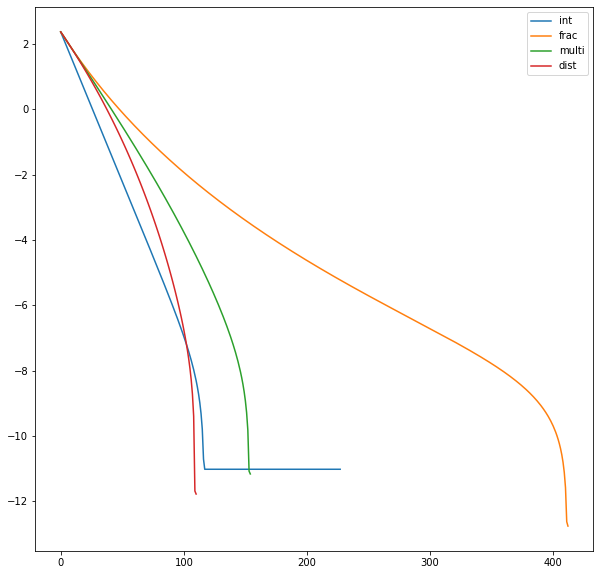

In [ ]:
plt.figure(figsize=(10, 10))


plt.plot(np.log10(np.array(fx_int)), label='int')
plt.plot(np.log10(np.array(fx_frac)), label='frac')
plt.plot(np.log10(np.array(fx_multi_frac)), label='multi')
plt.plot(np.log10(np.array(fx_dist_frac)), label='dist')

plt.legend();